In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Simply construct a set of data

In [2]:
df = pd.DataFrame({
    'level': [1,2,3,4,5,6,7,8,9,10],
    'salary': [45000,50000,60000,80000,110000,150000,200000,300000,500000,1000000]
})
df

,level,salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [3]:
df.to_csv('data/non_linear_reg.csv')

In [4]:
data = pd.read_csv('data/non_linear_reg.csv')

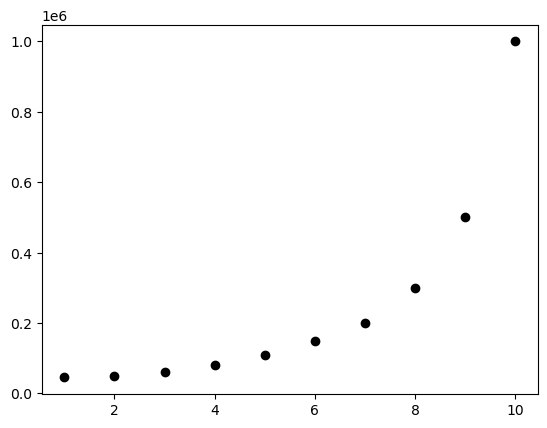

In [5]:
# scatter
plt.scatter(data.level, data.salary, color = 'black')

# Polynomial Regression Model -- Data Preparation

In [6]:
x = data[['level']]
y = data[['salary']]

quadratic_featurizer = PolynomialFeatures(degree = 3, interaction_only = False, include_bias = False)

x_quadratic = quadratic_featurizer.fit_transform(x)

x_quadratic

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

# Polynomial Regreesion

In [7]:
regressor_quadratic = linear_model.LinearRegression()

regressor_quadratic.fit(x_quadratic, y)
regressor_quadratic.score(x_quadratic, y)

print('Coefficients: \n', regressor_quadratic.coef_)
print('intercept: \n', regressor_quadratic.intercept_)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


0.9812097727913367

Coefficients: 
 [[180664.33566434 -48548.95104895   4120.04662005]]
intercept: 
 [-121333.33333334]


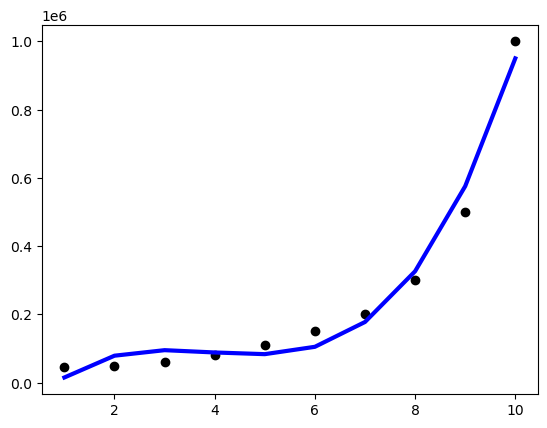

In [8]:
# plot
y_pred = regressor_quadratic.predict(x_quadratic)

plt.scatter(x, y, color = 'black')
plt.plot(x, y_pred, color = 'blue', linewidth = 3)

plt.show()